# install Pytrends

In [ ]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Connect to Google
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
Trending_topics = TrendReq(hl='en-US', tz=360)

In [ ]:
#Build Payload
query=input()
kw_list=[query]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')

harrys


In [ ]:
#Interest Over Time
Trending_topics.build_payload(kw_list=[query],cat=0, timeframe='today 12-m')
data = Trending_topics.interest_over_time()
data = data.sort_values(by=query, ascending = False)
data = data.head(10)
print(data)


            harrys  isPartial
date                         
2022-05-15     100      False
2022-05-22      80      False
2022-09-18      66      False
2022-09-11      65      False
2022-09-04      63      False
2022-03-20      59      False
2022-05-29      58      False
2021-12-26      58      False
2021-12-19      56      False
2022-06-05      55      False


In [ ]:
#Historical Hour Interest
kw_list = [query]
Trending_topics.build_payload(kw_list)
data = Trending_topics.get_historical_interest(
kw_list, year_start=2018, month_start=1, day_start=1,
hour_start=0, year_end=2018, month_end=2, day_end=1,
hour_end=0, cat=0, geo='', gprop='', sleep=0)
data = data.sort_values(by=query, ascending = False)
data = data.head(10)
print(data)

The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
The request failed: Google returned a response with code 500.
                     harrys  isPartial
date                                  
2018-01-28 00:00:00     100      False
2018-01-20 04:00:00     100      False
2018-01-27 18:00:00      99      False
2018-01-21 20:00:00      92      False
2018-01-23 21:00:00      92      False
2018-01-19 18:00:00      88      False
2018-01-23 17:00:00      88      False
2018-01-24 23:00:00      84      False
2018-01-22 00:00:00      83      False
2018-01-24 00:00:00      83      False


In [ ]:
#Interest By Region
data = Trending_topics.interest_by_region()
data = data.sort_values(by=query,ascending = False)
data = data.head(10)
print(data)

                    harrys
geoName                   
Gibraltar              100
Maldives                24
Sweden                   5
Albania                  4
Lebanon                  4
Ireland                  1
United Kingdom           1
Dominican Republic       1
Singapore                1
Australia                1


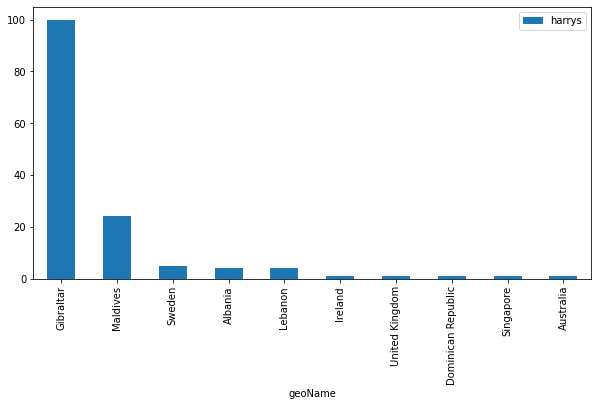

In [ ]:
# visualize the above data using a bar chart
data.reset_index().plot(x='geoName', y=query,figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

In [ ]:
#Top Charts(top trending searches yearly)
df = Trending_topics.top_charts(2020, hl='en-US',tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [ ]:
#Related Queries
Trending_topics.build_payload(kw_list=[query])
related_queries = Trending_topics.related_queries()
related_queries.values()

dict_values([{'top':                 query  value
0          harrys bar    100
1       harrys razors     90
2               harry     87
3        harrys house     53
4        harrys razor     43
5         harrys menu     32
6      harrys wedding     31
7        harrys pizza     31
8         harrys cafe     30
9   harrys restaurant     29
10       harrys shave     26
11         harrys dad     21
12      harrys london     20
13       harry potter     20
14      harrys styles     19
15        harrys home     17
16  harrys shave club     16
17       harry styles     15
18       happy harrys     15
19     harrys seafood     15
20       harrys horse     15
21       prince harry     15
22      harrys father     14
23     harrys shaving     14
24  prince harrys dad     13, 'rising':                         query  value
0          harrys house vinyl  14700
1       megan and harrys baby  11050
2          harrys house merch  10600
3                  harrys bcn   8100
4        harrys rasierer test

In [ ]:
#Keyword Suggestions
keywords = Trending_topics.suggestions(keyword=query)
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,Harrys of London,Topic
1,Harrys,Topic
2,Harry's Trees,Topic
3,PARQUE SANTIAGO 2,Topic
4,A Cosmology of Monsters: A Novel,Topic


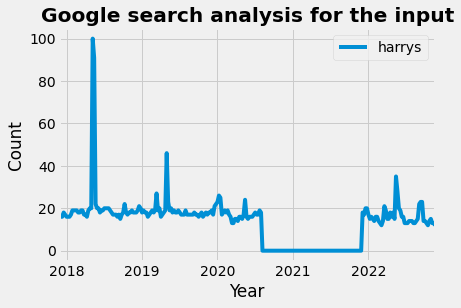

In [ ]:
data = TrendReq(hl='en-US',tz=360)
data.build_payload(kw_list = [query])
data = data.interest_over_time()
data.plot()
plt.title('Google search analysis for the input', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.style.use('fivethirtyeight')
plt.show()